# Marvel Universe Network Analysis with NetworkX

Import moduli vari:

In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plot
from itertools import combinations

## ETL Section
Il grafo è generato dal file csv importandolo come **dataframe** pandas. Ogni riga del csv rappresenta un arco del grafo. Il file csv ha 3 colonne: 
- *Source*: nodo di partenza, un eroe.
- *Target*: nodo di arrivo, un altro eroe.
- *Weight*: peso associato all'arco, calcolato come il numero di volte che i due eroi compaiono nello stesso fumetto.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mattialuzi/marvel-network-analysis/master/marvel-unimodal-edges.csv')
graph = nx.from_pandas_edgelist(df,'Source','Target','Weight')

### Tools

**draw_indexed_graph**: Sostituisce le etichette dei nodi (nome dell'eroe) con un indice numerico e lo disegna. Il nome dell'eroe viene riportato come attributo *Hero* del nodo.  
**filtered_graph**: Genera un sottografo eliminado gli archi con peso minore di quello minimo specificato.

In [0]:
def index_graph(graph):
  indexed_graph =  nx.convert_node_labels_to_integers(graph,label_attribute='Hero')
  return indexed_graph

def draw_graph(graph, min_weight=0):
  plot.figure(figsize=(30,20))
  nx.draw(graph, with_labels=True)
  plot.show()
  return

def filter_graph(graph, min_weight=0):
  if (min_weight > 0 ):
    important_edges = [e[:2] for e in graph.edges(data=True) if e[2]['Weight'] > min_weight]
    return graph.edge_subgraph(important_edges)
  else: 
    return graph

def plot_metric_bar_chart(metric, title='', ylabel=''):
  degree_centrality = nx.degree_centrality(graph)
  x = []
  x_pos =[]
  values = []
  for i,e in enumerate(metric):
    x_pos.append(i)
    x.append(e[0])
    values.append(e[1])
  plot.figure(figsize=(15, 5))
  plot.rc('font', size=12)
  plot.ylabel(ylabel)
  plot.title(title)
  plot.bar(x_pos, values, color='#e24a33')
  plot.xticks(x_pos, x, rotation=45, ha='right')
  plot.show()
  return

## Sezione Analisi

### Graph Drawing

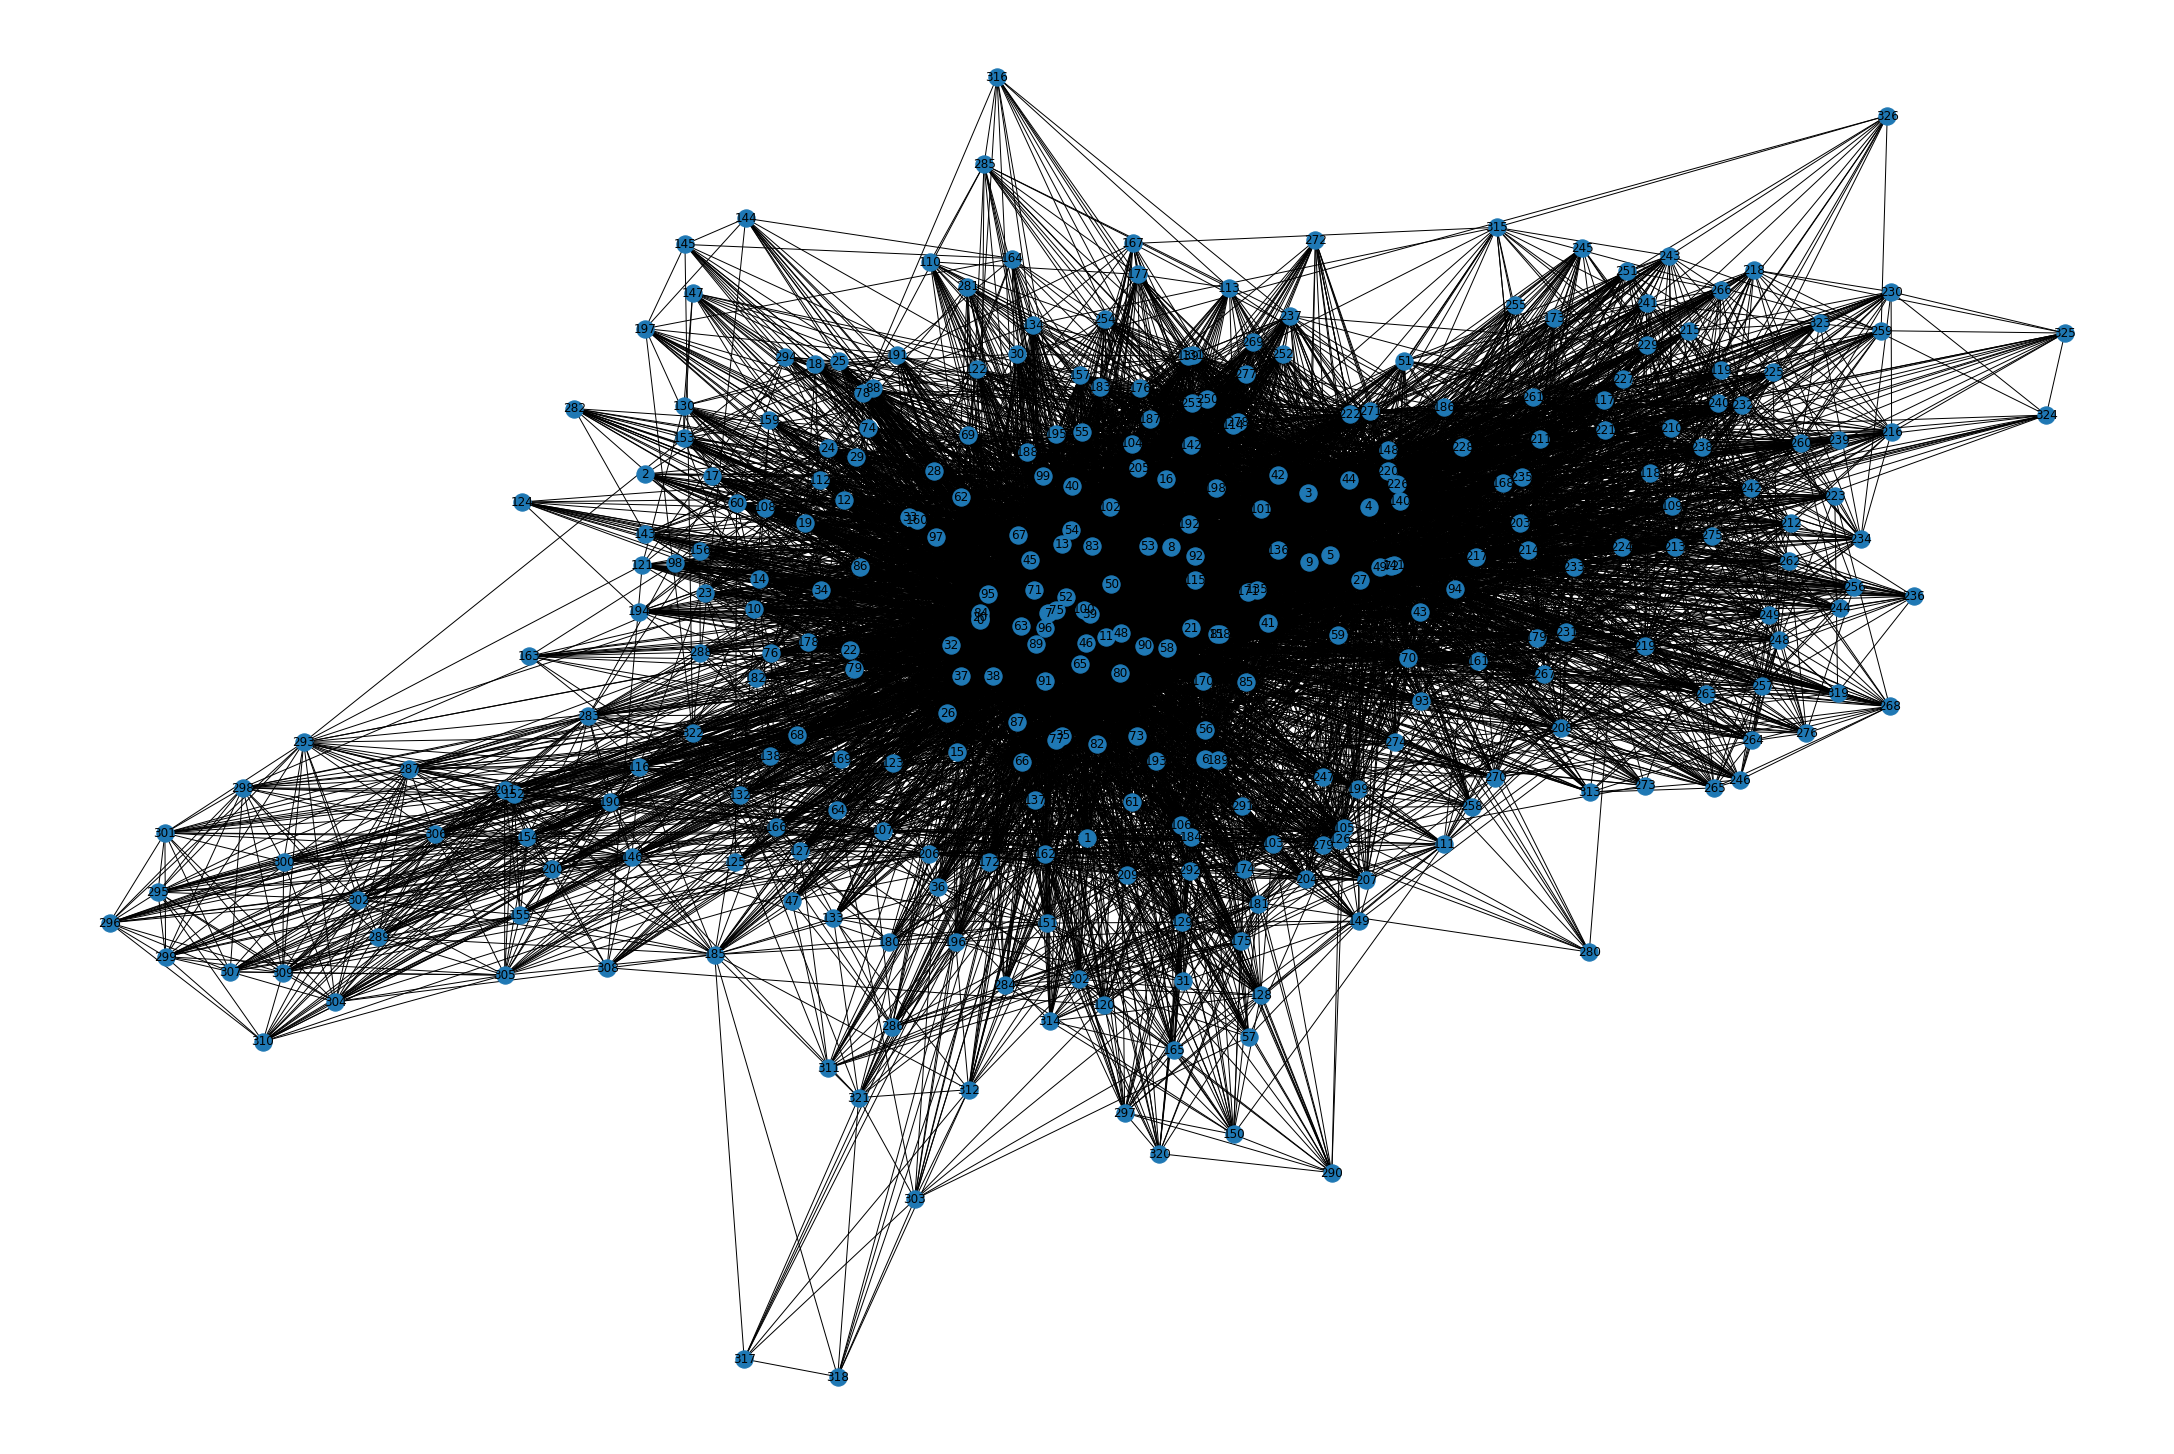

In [28]:
indexed_graph = index_graph(graph) 
draw_graph(indexed_graph)
nx.write_gexf(graph,'marvel_unimodal_edges.gexf')

**Hero_ID->Hero_Name:**

In [26]:
#@Inserisci Id Eroe
hero_id = 1 #@param {type:"integer"}
hero_name = indexed_graph.nodes(data=True)[hero_id]
print({hero_id: hero_name['Hero']})

{1: 'Loki [asgardian]'}


**Hero_Name->Hero_ID:**

In [0]:
#@Inserisci Nome Eroe
hero_name = "" #@param {type:"string"}
for k,v in indexed_graph.nodes(data=True):
  if v['Hero'] == hero_name:
    print({k: hero_name})
    break

AttributeError: ignored

### General Metrics

In [0]:
n_nodes = graph.number_of_nodes()
print('\033[1m'+'Numero di Nodi: '+'\033[0m', n_nodes)
n_edges = graph.number_of_edges()
print('\033[1m'+'Numero di Archi: '+'\033[0m', n_edges)
density = nx.density(graph)
# density = 2*n_edges/(n_nodes * (n_nodes-1))
print('\033[1m'+'Densità: '+'\033[0m',density)
# degree_centrality = nx.degree_centrality(graph)
density_weight = 2*sum([e[2]['Weight'] for e in graph.edges(data=True)])/(n_nodes * (n_nodes-1))
print('\033[1m'+'Densità Pesata: '+'\033[0m', density_weight)
# avg_degree_centrality= sum(degree_centrality.values())/n_nodes
# print('\033[1m'+'Degree Centrality (Media): '+'\033[0m', avg_degree_centrality)
radius = nx.radius(graph)
print('\033[1m'+'Raggio: '+'\033[0m', radius)
diameter = nx.diameter(graph)
print('\033[1m'+'Diametro: '+'\033[0m', diameter)
periphery = nx.periphery(graph)
# print('\033[1m'+'Periferia: '+'\033[0m', *periphery, sep='.\n')
print('\033[1m'+'Periferia: '+'\033[0m', periphery)

Numero di Nodi:  327
Numero di Archi:  9891
Densità:  0.1855687510553273
Densità Pesata:  4.066809253109698
Raggio:  2
Diametro:  3
Periferia:  ['Loki [asgardian]', 'Mantis / ? Brandt', 'Klaw / Ulysses Klaw', 'Firebird / Bonita Juar', 'Medusa / Medusalith Am', 'Jack Of Hearts / Jack', 'Mephisto', 'Swordsman / Jacques Du', 'Collector / Taneleer T', 'Lockjaw [inhuman]', 'Pharaoh Rama-tut', 'Ant-man Ii / Scott Har', 'Lyja Lazerfist [skru', 'Gorgon [inhuman]', 'Nighthawk Ii / Kyle Ri', 'Cage, Luke / Carl Luca', 'Hellcat / Patsy Walker', 'Karnak [inhuman]', 'Redwing', 'Daredevil / Matt Murdo', 'Norriss, Sister Barb', 'Rage / Elvin Daryl Hal', 'Demolition Man / Denni', 'Sersi / Sylvia', 'Gyrich, Henry Peter', 'Ghaur [deviant]', 'Carter, Sharon', 'Black Knight V / Dane', 'Sunfire / Shiro Yoshid', 'Triton', 'Ultron', 'Jones, Richard Milho', 'Nelson, Franklin Fog', 'Jarvis, Edwin', 'Jameson, J. Jonah', 'Masters, Alicia Reis', 'Iron Fist / Daniel Ran', 'Black Bolt / Blackanto', 'Sandman / Willia

### Degree Centrality

Best 10 Degree Centrality:

1. Captain America: 0.7914110429447853
2. Wolverine / Logan: 0.6748466257668712
3. Spider-man / Peter Parker: 0.6687116564417178
4. Thing / Benjamin J. Gr: 0.656441717791411
5. Vision: 0.6533742331288344
6. Thor / Dr. Donald Blak: 0.6288343558282209
7. Beast / Henry &hank& P: 0.6288343558282209
8. Iron Man / Tony Stark: 0.6226993865030676
9. Mr. Fantastic / Reed R: 0.6073619631901841
10. Cyclops / Scott Summer: 0.6042944785276074

Worst 10 Degree Centrality:

1. Black Mamba / Tanya Se: 0.024539877300613498
2. Asp Ii / Cleo: 0.024539877300613498
3. Wing, Colleen: 0.03680981595092025
4. Deadpool / Jack / Wade W: 0.03987730061349693
5. Skin / Angelo Espinosa: 0.04294478527607362
6. Diamond Lil / Lillian: 0.04294478527607362
7. Dr. Spectrum / Joseph: 0.046012269938650305
8. Whizzer Ii / Stanley S: 0.046012269938650305
9. Husk / Paige Guthrie: 0.049079754601226995
10. Page, Karen: 0.049079754601226995



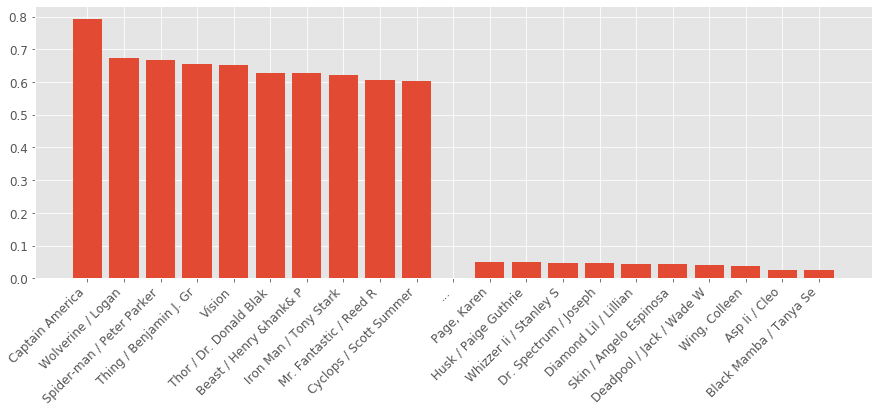

In [0]:
degree_centrality = nx.degree_centrality(graph)
sorted_dc = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Degree Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_dc[i][0])+': '+str(sorted_dc[i][1]))
print('')
print('\033[1m'+'Worst 10 Degree Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_dc[i][0])+': '+str(sorted_dc[i][1]))
print('')
plot_metric_bar_chart(sorted_dc[:10]+[('...',0)]+sorted_dc[-10:])

### Closeness Centrality

Best 10 Closeness Centrality:

1. Captain America: 0.8274111675126904
2. Wolverine / Logan: 0.7546296296296297
3. Spider-man / Peter Parker: 0.7511520737327189
4. Thing / Benjamin J. Gr: 0.7442922374429224
5. Vision: 0.7425968109339408
6. Thor / Dr. Donald Blak: 0.7293064876957495
7. Beast / Henry &hank& P: 0.7293064876957495
8. Iron Man / Tony Stark: 0.7260579064587973
9. Mr. Fantastic / Reed R: 0.7180616740088106
10. Cyclops / Scott Summer: 0.7164835164835165

Worst 10 Closeness Centrality:

1. Deadpool / Jack / Wade W: 0.4014778325123153
2. Lubenski, Nate: 0.44173441734417346
3. Mercado, Joy: 0.4429347826086957
4. Katzenberg, Nick: 0.4429347826086957
5. Robertson, Randy: 0.4435374149659864
6. Cushing, Kate: 0.44474761255115963
7. Grant, Gloria Glory: 0.4478021978021978
8. Skin / Angelo Espinosa: 0.4490358126721763
9. Arranger / : 0.4490358126721763
10. Husk / Paige Guthrie: 0.4496551724137931



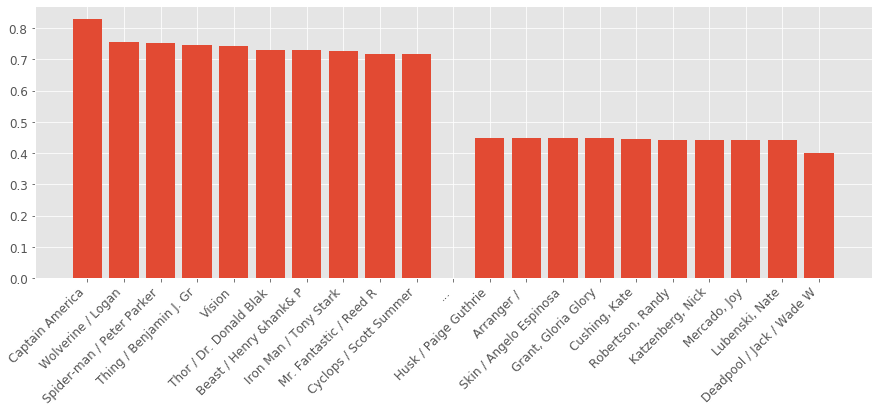

In [0]:
closeness_centrality = nx.closeness_centrality(graph)
sorted_cc = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Closeness Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_cc[i][0])+': '+str(sorted_cc[i][1]))
print('')
print('\033[1m'+'Worst 10 Closeness Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_cc[i][0])+': '+str(sorted_cc[i][1]))
print('')
plot_metric_bar_chart(sorted_cc[:10]+[('...',0)]+sorted_cc[-10:])

Best 10 Closeness Centrality (Distance):

1. Vision: 0.09760479041916167
2. Invisible Woman / Sue: 0.09711051534107834
3. Spider-woman Ii / Juli: 0.09664986658760748
4. Thing / Benjamin J. Gr: 0.09582598471487361
5. Mr. Fantastic / Reed R: 0.095797825448134
6. Iron Man / Tony Stark: 0.09562921677911411
7. Daredevil / Matt Murdo: 0.09540532630962834
8. Wolfsbane / Rahne Sinc: 0.0946298984034833
9. Iron Man Doppelgange: 0.09441065739936287
10. Mr. Fantastic Doppel: 0.0942468921653657

Worst 10 Closeness Centrality (Distance):

1. Black Mamba / Tanya Se: 0.05462466487935657
2. Asp Ii / Cleo: 0.05844388669774113
3. Spider-man Clone / Ben: 0.06022538333641234
4. Robertson, Randy: 0.061497830598000375
5. Mercado, Joy: 0.061707363240583
6. Wing, Colleen: 0.06195362979855568
7. Lubenski, Nate: 0.06215443279313632
8. Grant, Gloria Glory: 0.06230886850152905
9. Arranger / : 0.06265615990774553
10. Cushing, Kate: 0.06286155032780563



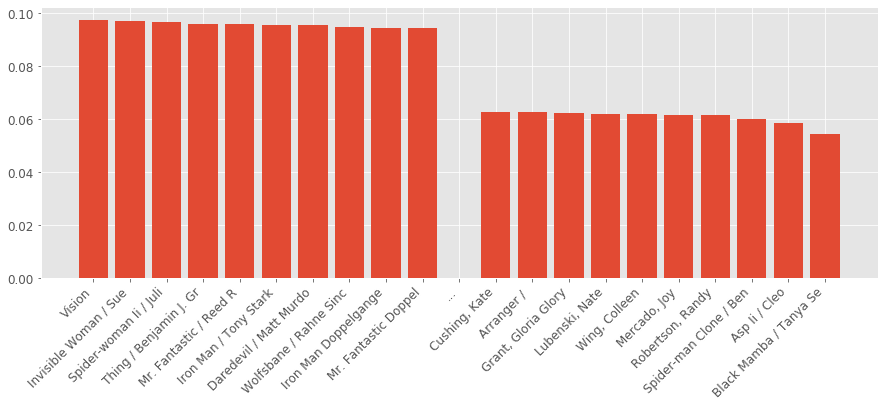

In [0]:
closeness_centrality_d = nx.closeness_centrality(graph, distance="Weight")
sorted_ccd = sorted(closeness_centrality_d.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Closeness Centrality (Distance):\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_ccd[i][0])+': '+str(sorted_ccd[i][1]))
print('')
print('\033[1m'+'Worst 10 Closeness Centrality (Distance):\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_ccd[i][0])+': '+str(sorted_ccd[i][1]))
print('')
plot_metric_bar_chart(sorted_ccd[:10]+[('...',0)]+sorted_ccd[-10:])

### Betweenness Centrality

Best 10 Betweenness Centrality:

1. Captain America: 0.06712415218882699
2. Spider-man / Peter Parker: 0.06180893220299028
3. Wolverine / Logan: 0.03548708687569773
4. Beast / Henry &hank& P: 0.03120304535740402
5. Thor / Dr. Donald Blak: 0.02864758978950041
6. Vision: 0.028624301178771634
7. Thing / Benjamin J. Gr: 0.025036538867153575
8. Iron Man / Tony Stark: 0.024893411682719642
9. Cyclops / Scott Summer: 0.02234756637425961
10. Mr. Fantastic / Reed R: 0.021072080826848166



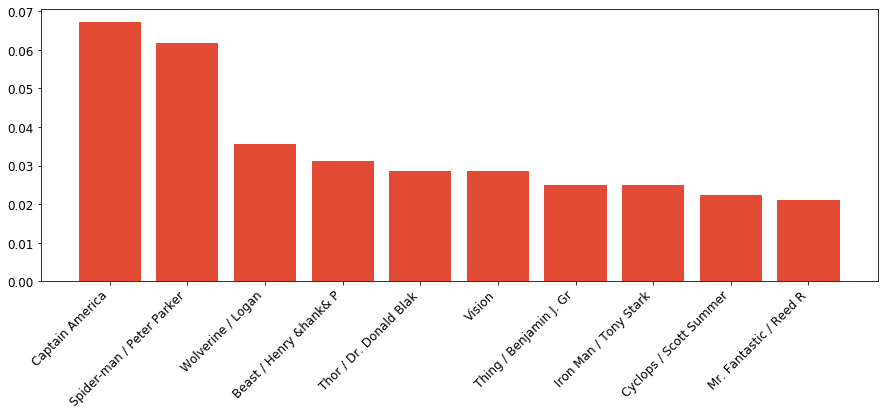


Worst 10 Betweenness Centrality:

1. Colossus Ii Doppelga: 0.0
2. Leader / Sam Sterns: 0.0
3. Iron Man Doppelgange: 1.4307437620321056e-06
4. Black Mamba / Tanya Se: 1.8876828692779614e-06
5. Asp Ii / Cleo: 1.8876828692779614e-06
6. Maximus [inhuman]: 3.6573769081418327e-06
7. Diamond Lil / Lillian: 7.420902154822149e-06
8. Hogan, Virginia Pepp: 7.821043037316634e-06
9. Le Fey, Morgan: 8.50500473533459e-06
10. Mr. Fantastic Doppel: 9.185904295519584e-06



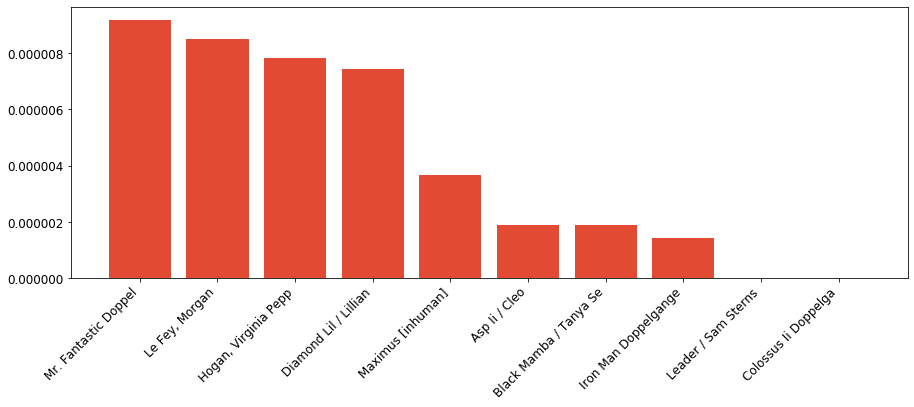

In [0]:
betweenness_centrality = nx.betweenness_centrality(graph)
sorted_bc = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Betweenness Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_bc[i][0])+': '+str(sorted_bc[i][1]))
print('')
plot_metric_bar_chart(sorted_bc[:10])
print('')
print('\033[1m'+'Worst 10 Betweenness Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_bc[i][0])+': '+str(sorted_bc[i][1]))
print('')
plot_metric_bar_chart(sorted_bc[-10:])

Best 10 Betweenness Centrality (Weight):

1. Vision: 0.03941749627059079
2. Invisible Woman / Sue: 0.02725756438353751
3. Daredevil / Matt Murdo: 0.026256025160933134
4. Iron Man / Tony Stark: 0.024233849950933473
5. Captain America: 0.024010574622489227
6. Thing / Benjamin J. Gr: 0.02247898133382609
7. Spider-man / Peter Parker: 0.020274900444319968
8. Mr. Fantastic / Reed R: 0.0195962256286781
9. Jarvis, Edwin: 0.017723621300308415
10. Quicksilver / Pietro M: 0.016773574567932686



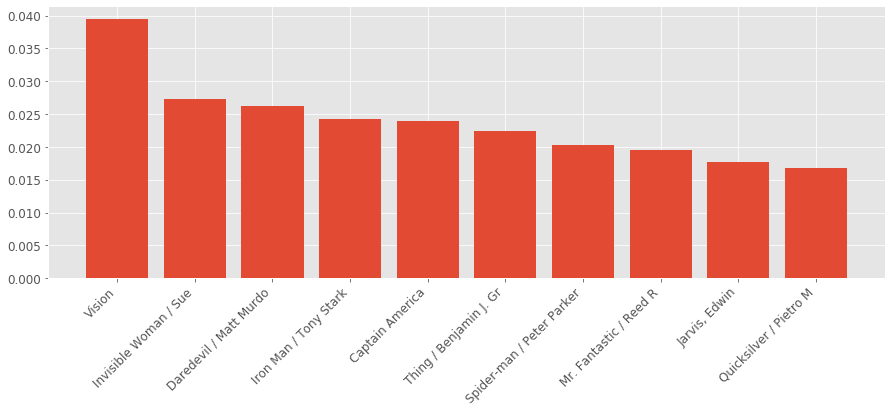


Worst 10 Betweenness Centrality (Weight):

1. Black Mamba / Tanya Se: 0.0
2. Asp Ii / Cleo: 0.0
3. Wing, Colleen: 0.0
4. Maddicks, Arthur Art: 0.0
5. Hogan, Virginia Pepp: 0.0
6. Volcana / Marsha Rosen: 6.292276230926537e-06
7. Dr. Spectrum / Joseph: 9.438414346389807e-06
8. Cushing, Kate: 1.415762151958471e-05
9. Spider-man Clone / Ben: 1.415762151958471e-05
10. Diamond Lil / Lillian: 1.8876828692779613e-05



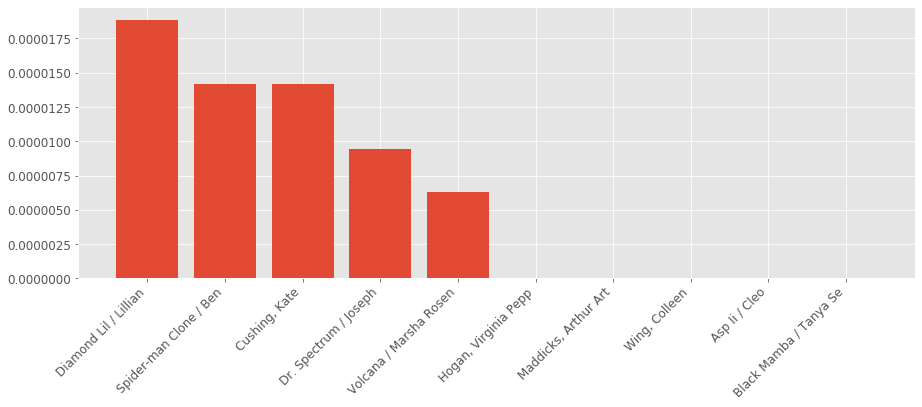

In [0]:
betweenness_centrality_w = nx.betweenness_centrality(graph, weight='Weight')
sorted_bcw = sorted(betweenness_centrality_w.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Betweenness Centrality (Weight):\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_bcw[i][0])+': '+str(sorted_bcw[i][1]))
print('')
plot_metric_bar_chart(sorted_bcw[:10])
print('')
print('\033[1m'+'Worst 10 Betweenness Centrality (Weight):\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_bcw[i][0])+': '+str(sorted_bcw[i][1]))
print('')
plot_metric_bar_chart(sorted_bcw[-10:])

### EigenVector Centrality

Best 10 Eigenvector Centrality:

1. Captain America: 0.13941785504994617
2. Wolverine / Logan: 0.13121783135400517
3. Thing / Benjamin J. Gr: 0.12975481662615557
4. Vision: 0.12724678955195506
5. Beast / Henry &hank& P: 0.12603871185523002
6. Spider-man / Peter Parker: 0.12375136293229144
7. Human Torch / Johnny S: 0.12317990777171622
8. Invisible Woman / Sue: 0.12314979958453579
9. Cyclops / Scott Summer: 0.12308850237890227
10. Scarlet Witch / Wanda: 0.12228444525384438

Worst 10 Eigenvector Centrality:

1. Black Mamba / Tanya Se: 0.003236230210683329
2. Asp Ii / Cleo: 0.003236230210683329
3. Katzenberg, Nick: 0.004393748177175905
4. Mercado, Joy: 0.0045857398067823355
5. Deadpool / Jack / Wade W: 0.004735188201788798
6. Cushing, Kate: 0.004793731131035491
7. Lubenski, Nate: 0.004811210079931285
8. Robertson, Randy: 0.005029030299858997
9. Arranger / : 0.005348186476768949
10. Hammerhead: 0.005621779491376118



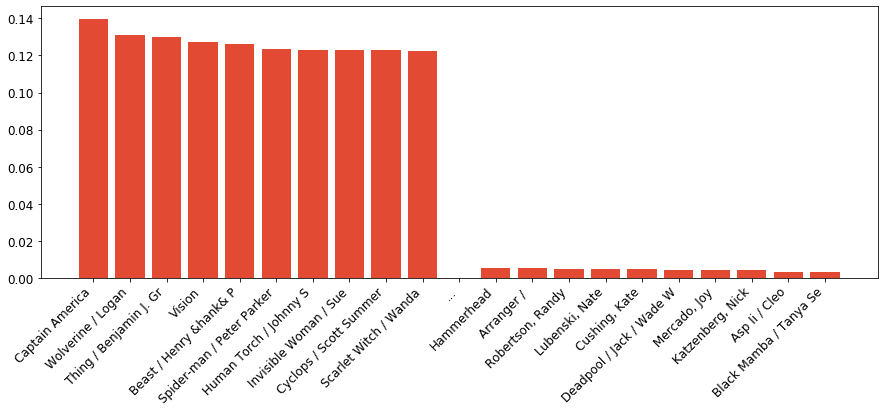

In [0]:
eigenvector_centrality= nx.eigenvector_centrality(graph)
sorted_ec = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Eigenvector Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_ec[i][0])+': '+str(sorted_ec[i][1]))
print('')
print('\033[1m'+'Worst 10 Eigenvector Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_ec[i][0])+': '+str(sorted_ec[i][1]))
print('')
plot_metric_bar_chart(sorted_ec[:10]+[('...',0)]+sorted_ec[-10:])

Best 10 Eigenvector Centrality (Weight):

1. Captain America: 0.28045040108548497
2. Thing / Benjamin J. Gr: 0.2420331228441984
3. Human Torch / Johnny S: 0.2376877338553235
4. Mr. Fantastic / Reed R: 0.23376204752422408
5. Iron Man / Tony Stark: 0.22995062964339774
6. Invisible Woman / Sue: 0.22505409426872902
7. Scarlet Witch / Wanda: 0.21871075469914425
8. Vision: 0.21555556100638712
9. Thor / Dr. Donald Blak: 0.203266096104738
10. Wasp / Janet Van Dyne: 0.20274125185141803

Worst 10 Eigenvector Centrality (Weight):

1. Deadpool / Jack / Wade W: 0.00039519011334108583
2. Bridge, George Washi: 0.0010397378530991078
3. Husk / Paige Guthrie: 0.00158477133342102
4. Tombstone / Lonnie Tho: 0.001600544723896993
5. Asp Ii / Cleo: 0.0017299741789925977
6. Hammerhead: 0.0018663602994825354
7. Skin / Angelo Espinosa: 0.0018745387529517839
8. Black Mamba / Tanya Se: 0.0019087861563733164
9. Katzenberg, Nick: 0.002023965759130418
10. Arranger / : 0.002096197385722589



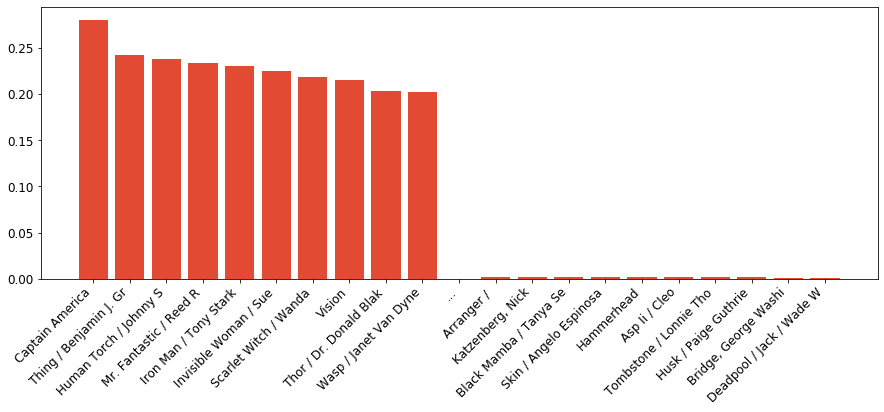

In [0]:
eigenvector_centrality_w = nx.eigenvector_centrality(graph,weight='Weight')
sorted_ecw = sorted(eigenvector_centrality_w.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Eigenvector Centrality (Weight):\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_ecw[i][0])+': '+str(sorted_ecw[i][1]))
print('')
print('\033[1m'+'Worst 10 Eigenvector Centrality (Weight):\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_ecw[i][0])+': '+str(sorted_ecw[i][1]))
print('')
plot_metric_bar_chart(sorted_ecw[:10]+[('...',0)]+sorted_ecw[-10:])

### Triads

In [0]:
min_weight = 80
filtered_graph = filter_graph(graph, min_weight)
weighted_triads = []
for tr in combinations(filtered_graph.nodes, 3):
  triad_graph = filtered_graph.subgraph(tr)
  if (triad_graph.number_of_edges() == 3):
    weighted_triads.append((tr,triad_graph[tr[0]][tr[1]]['Weight']+triad_graph[tr[1]][tr[2]]['Weight']+triad_graph[tr[0]][tr[2]]['Weight']))
sorted_wt = sorted(weighted_triads, key=lambda item: item[1], reverse=True)
print('\033[1m'+'Most Relevant Triads:\n'+'\033[0m')
for i in range(20):
    print(str(i+1)+'. '+str(sorted_wt[i][0])[1:-1]+' ('+str(sorted_wt[i][1])+') ')

Most Relevant Triads:

1. 'Thing / Benjamin J. Gr', 'Human Torch / Johnny S', 'Mr. Fantastic / Reed R' (2165) 
2. 'Human Torch / Johnny S', 'Invisible Woman / Sue', 'Mr. Fantastic / Reed R' (2108) 
3. 'Thing / Benjamin J. Gr', 'Human Torch / Johnny S', 'Invisible Woman / Sue' (2106) 
4. 'Thing / Benjamin J. Gr', 'Invisible Woman / Sue', 'Mr. Fantastic / Reed R' (2077) 
5. 'Watson-parker, Mary', 'Jameson, J. Jonah', 'Spider-man / Peter Parker' (1377) 
6. 'Iron Man / Tony Stark', 'Scarlet Witch / Wanda', 'Captain America' (1192) 
7. 'Watson-parker, Mary', 'Parker, May', 'Spider-man / Peter Parker' (1184) 
8. 'Scarlet Witch / Wanda', 'Captain America', 'Vision' (1181) 
9. 'Iron Man / Tony Stark', 'Thor / Dr. Donald Blak', 'Captain America' (1176) 
10. 'Robertson, Joe', 'Jameson, J. Jonah', 'Spider-man / Peter Parker' (1168) 
11. 'Iron Man / Tony Stark', 'Captain America', 'Vision' (1164) 
12. 'Invisible Woman / Sue', 'Mr. Fantastic / Reed R', 'Richards, Franklin B' (1159) 
13. 'Watson-par

### Ego Networks


Hero with the greatest number of connections: Captain America (258)
Ego Network (Prefiltered) Captain America: 


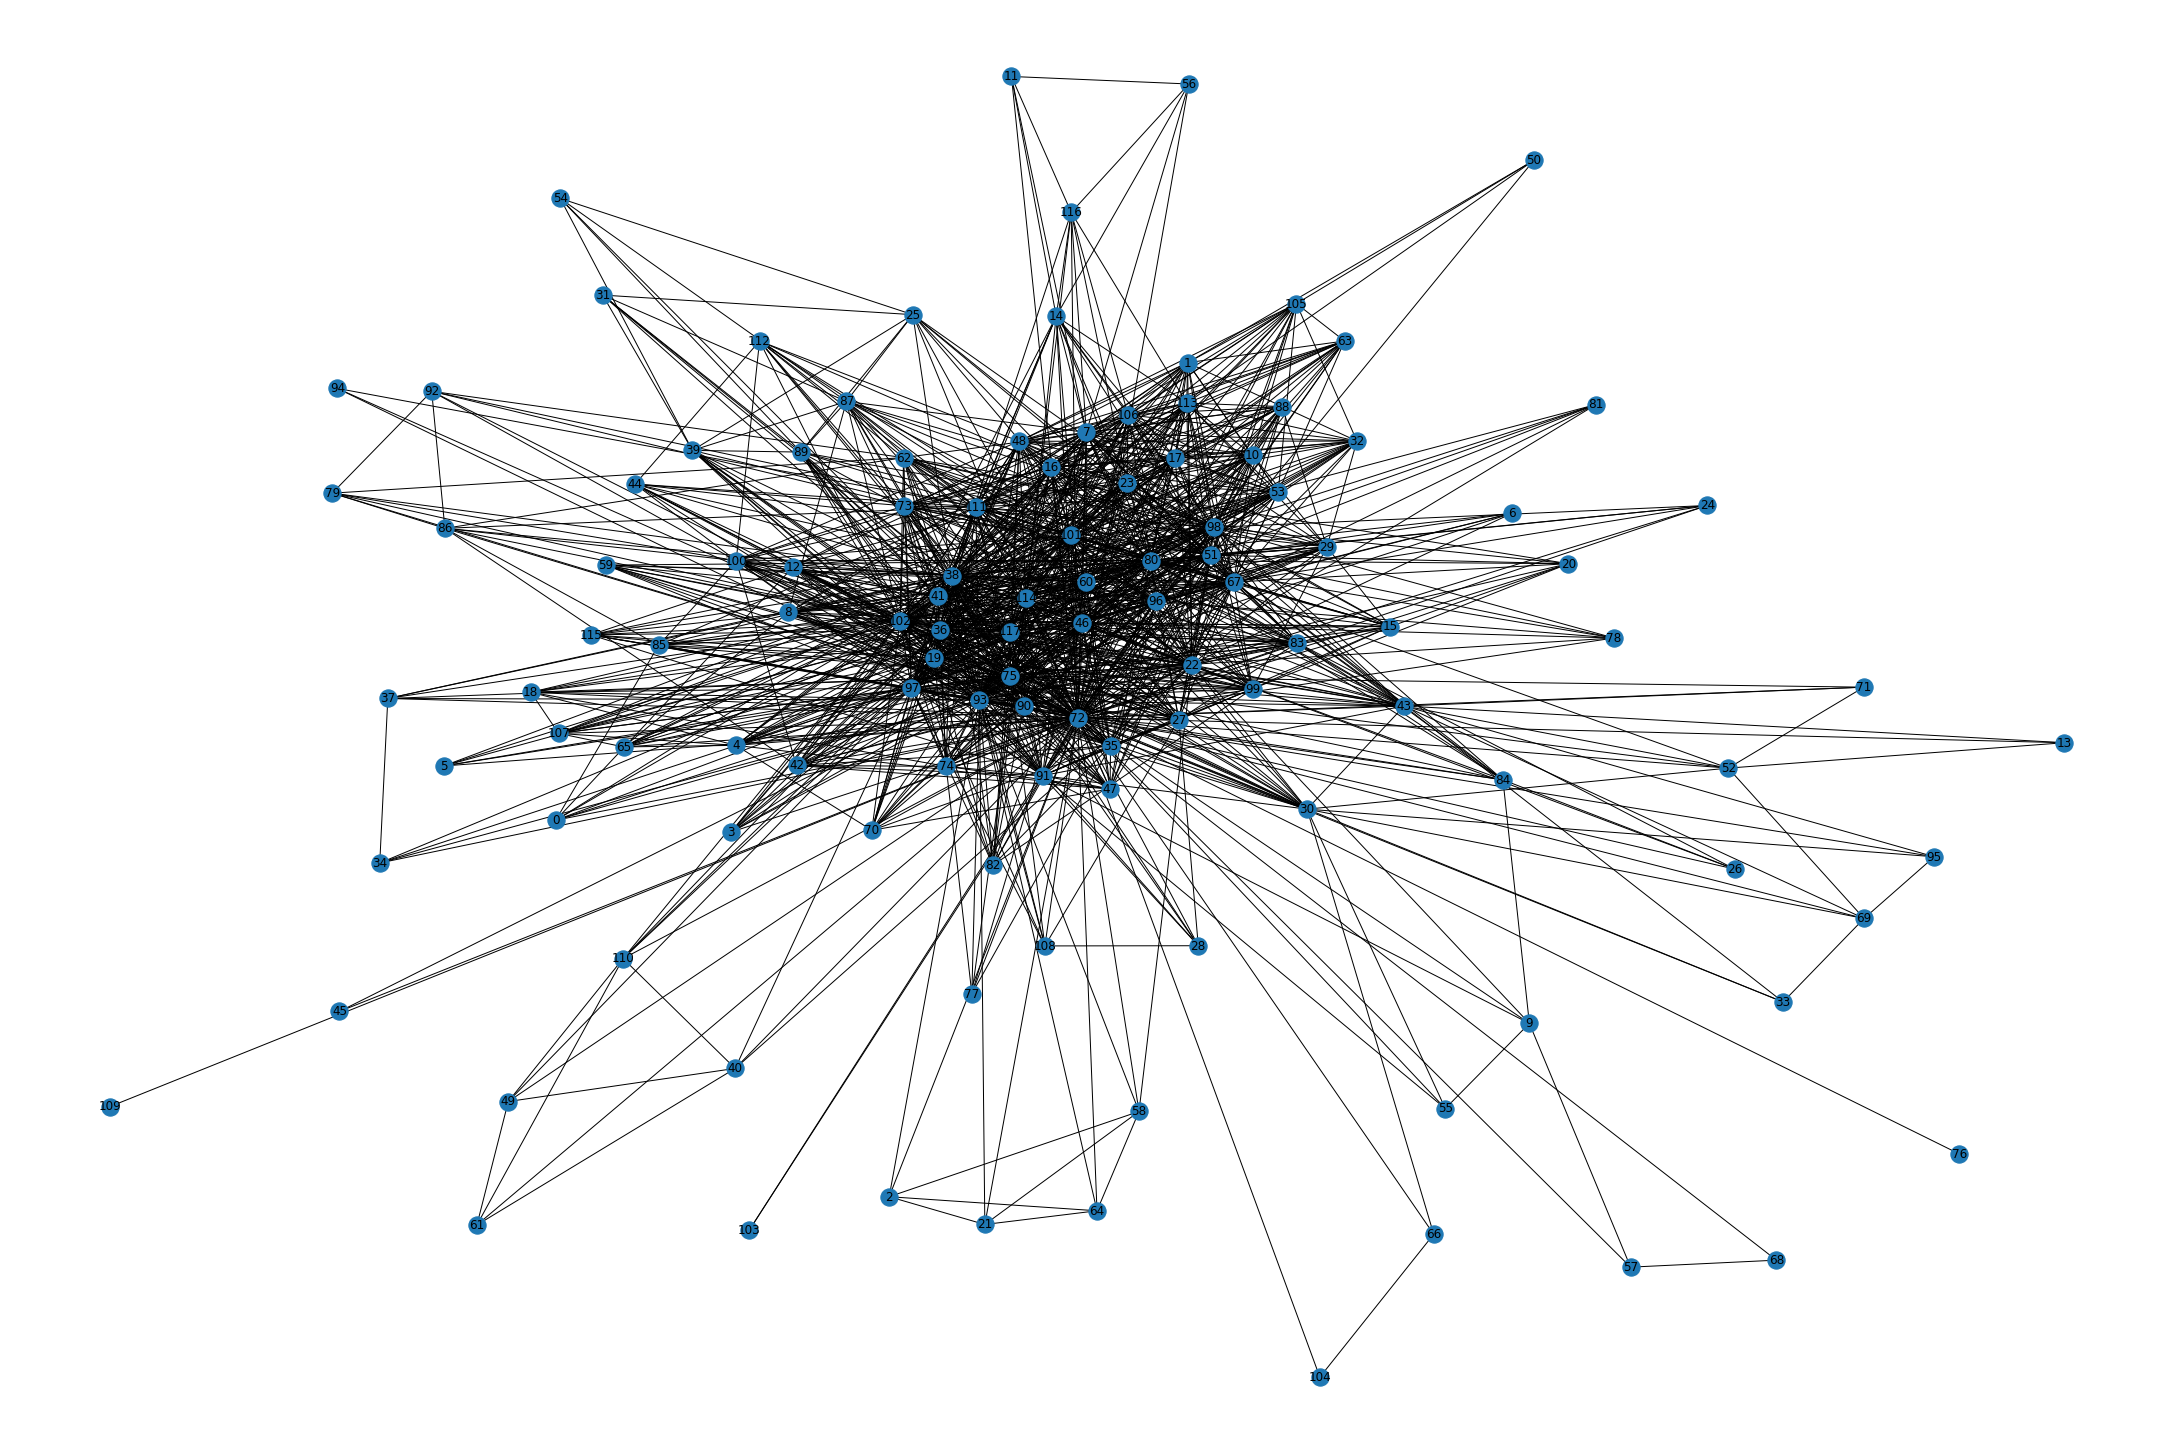

In [33]:
nodes_degrees = graph.degree()
top_deg_node = max(nodes_degrees, key=lambda item: item[1])
print('\033[1m'+'Hero with the greatest number of connections: '+'\033[0m'+str(top_deg_node[0])+' ('+str(top_deg_node[1])+')')
min_weight = 20
print('\033[1m'+'Ego Network (Prefiltered) '+'\033[0m'+str(top_deg_node[0])+': ')
filtered_graph = filter_graph(graph,min_weight)
ego_network = nx.ego_graph(filtered_graph, top_deg_node[0])
draw_graph(index_graph(ego_network))

### Bridges (Cut-Edges)

In [0]:
min_weight = 20
bridges = nx.bridges(filter_graph(graph,min_weight))
print(list(bridges))

[('Wolverine / Logan', 'Spider-woman / Jessica'), ('Dr. Strange / Stephen', 'Eternity / Adam Qadmon'), ('Mephisto', 'Silver Surfer / Norrin'), ('Thanos', 'Death'), ('Sub-mariner / Namor Ma', 'Attuma'), ('Sub-mariner / Namor Ma', 'Stingray / Dr. Walter'), ('Demolition Man / Denni', 'Captain America'), ('Spider-man / Peter Parker', 'Cloak / Tyrone Johnson'), ('Spider-man / Peter Parker', 'Hammerhead'), ('Iron Man / Tony Stark', 'Hogan, Virginia Pepp'), ('Captain America', 'Cobra / Klaus Vorhees'), ('Professor X / Charles', 'Juggernaut / Cain Mark'), ('Thor / Dr. Donald Blak', 'High Evolutionary / He'), ('Black Widow / Natasha', 'Darkstar / Laynia Serg'), ('Thing / Benjamin J. Gr', 'Molecule Man / Owen Re'), ('Mystique / Raven Darkh', 'Spiral'), ('Mister Hyde / Calvin Z', 'Cobra / Klaus Vorhees'), ('Darkstar / Laynia Serg', 'Vanguard / Nicolai Kry'), ('Lilandra Neramani [s', 'Gladiator Ii'), ('Cloak / Tyrone Johnson', 'Dagger / Tandy Bowen'), ('Absorbing Man / Carl C', 'Titania Ii / Mary 

### Articulation Points (Cut-Vertices)

In [0]:
min_weight = 20
art_points = nx.articulation_points(filter_graph(graph,min_weight))
bc_w = nx.betweenness_centrality(graph, weight='Weight')
art_bcw={}
for art_point in art_points:
  art_bcw.update({ art_point : bc_w[art_point]})
sorted_art_bcw = sorted(art_bcw.items(), key=lambda item: item[1], reverse=True)
#print(sorted_art_bcw)
print('\033[1m'+'Articulation Points sorted by Betweenness Centrality (Weight):\n'+'\033[0m')
for i,e in enumerate(sorted_art_bcw):
    print(str(i+1)+'. '+str(e[0])+': '+str(e[1]))
print('')

Articulation Points sorted by Betweenness Centrality (Weight):

1. Iron Man / Tony Stark: 0.024233849950933473
2. Captain America: 0.024010574622489227
3. Thing / Benjamin J. Gr: 0.02247898133382609
4. Spider-man / Peter Parker: 0.020274900444319968
5. Thor / Dr. Donald Blak: 0.015487667724029425
6. Sub-mariner / Namor Ma: 0.014010506011213892
7. Wolverine / Logan: 0.01400851791427257
8. Dr. Strange / Stephen: 0.011098307870897604
9. Silver Surfer / Norrin: 0.009564621472596934
10. Black Widow / Natasha: 0.008652239135202801
11. Professor X / Charles: 0.007821192859890367
12. Summers, Nathan Chri: 0.004490796045150919
13. Lilandra Neramani [s: 0.00435052425944356
14. Mystique / Raven Darkh: 0.002675545033177656
15. Thanos: 0.0015429333111262866
16. Darkstar / Laynia Serg: 0.0010447485667177177
17. Absorbing Man / Carl C: 0.0008405180368370555
18. Cloak / Tyrone Johnson: 0.0007762196903301199
19. Cobra / Klaus Vorhees: 0.0006915960658291949
20. Summers, Madelyne Ma: 0.000391088121149470

### Group Centrality 

#### Fantastic 4

In [0]:
f4 = ['Human Torch / Johnny S', 'Thing / Benjamin J. Gr', 'Invisible Woman / Sue', 'Mr. Fantastic / Reed R']
f4_degree = nx.group_degree_centrality(graph, f4)
print('\033[1m'+'Degree Centrality: '+'\033[0m'+str(f4_degree))
f4_closeness = nx.group_closeness_centrality(graph, f4)
print('\033[1m'+'Closeness Centrality: '+'\033[0m'+str(f4_closeness))
f4_closeness_w = nx.group_closeness_centrality(graph, f4, weight='Weight')
print('\033[1m'+'Closeness Centrality (Weight): '+'\033[0m'+str(f4_closeness_w))
f4_betweenness = nx.group_betweenness_centrality(graph, f4)
print('\033[1m'+'Betweenness Centrality: '+'\033[0m'+str(f4_betweenness))
#f4_betweenness_w = nx.group_betweenness_centrality(graph, f4, weight='Weight')
#print('\033[1m'+'Betweenness Centrality (Weight): '+'\033[0m'+str(f4_betweenness_w))

Degree Centrality: 0.6873065015479877
Closeness Centrality: 0.7617924528301887
Closeness Centrality (Weight): 0.10964019008825526
Betweenness Centrality: 0.08396802953130086
Betweenness Centrality (Weight): 0.08184577756692528


#### Avengers (Founders '60)

In [0]:
avengers = ['Captain America','Ant-man / Dr. Henry J.', 'Wasp / Janet Van Dyne', 'Thor / Dr. Donald Blak', 'Iron Man / Tony Stark', 'Hulk / Dr. Robert Bruce Banner']
avengers_degree = nx.group_degree_centrality(graph, avengers)
print('\033[1m'+'Degree Centrality: '+'\033[0m'+str(avengers_degree))
avengers_closeness = nx.group_closeness_centrality(graph, avengers)
print('\033[1m'+'Closeness Centrality: '+'\033[0m'+str(avengers_closeness))
avengers_closeness_w = nx.group_closeness_centrality(graph, avengers, weight='Weight')
print('\033[1m'+'Closeness Centrality (Weight): '+'\033[0m'+str(avengers_closeness_w))
avengers_betweenness = nx.group_betweenness_centrality(graph, avengers)
print('\033[1m'+'Betweenness Centrality: '+'\033[0m'+str(avengers_betweenness))
#avengers_betweenness_w = nx.group_betweenness_centrality(graph, avengers, weight='Weight')
#print('\033[1m'+'Betweenness Centrality (Weight): '+'\033[0m'+str(avengers_betweenness_w))

Degree Centrality: 0.8161993769470405
Closeness Centrality: 0.8447368421052631
Closeness Centrality (Weight): 0.12783751493428913
Betweenness Centrality: 0.16526851294879671
Betweenness Centrality (Weight): 0.11180489868304658


#### X-Men (Most Popular)





In [0]:
xMen = ['Professor X / Charles', 'Cyclops / Scott Summer', 'Beast / Henry &hank& P', 'Wolverine / Logan', 'Angel / Warren Kenneth', 'Marvel Girl / Jean Grey', 'Iceman / Robert Bobby', 'Havok / Alex Summers', 'Colossus Ii / Peter Ra', 'Nightcrawler / Kurt Wa', 'Storm / Ororo Munroe S']
xMen_degree = nx.group_degree_centrality(graph, xMen)
print('\033[1m'+'Degree Centrality: '+'\033[0m'+str(xMen_degree))
xMen_closeness = nx.group_closeness_centrality(graph, xMen)
print('\033[1m'+'Closeness Centrality: '+'\033[0m'+str(xMen_closeness))
xMen_closeness_w = nx.group_closeness_centrality(graph, xMen, weight='Weight')
print('\033[1m'+'Closeness Centrality (Weight): '+'\033[0m'+str(xMen_closeness_w))
xMen_betweenness = nx.group_betweenness_centrality(graph, xMen)
print('\033[1m'+'Betweenness Centrality: '+'\033[0m'+str(xMen_betweenness))
#xMen_betweenness_w = nx.group_betweenness_centrality(graph, xMen, weight='Weight')
#print('\033[1m'+'Betweenness Centrality (Weight): '+'\033[0m'+str(xMen_betweenness_w))

Degree Centrality: 0.7689873417721519
Closeness Centrality: 0.8123393316195373
Closeness Centrality (Weight): 0.1253968253968254
Betweenness Centrality: 0.1996446921476058
Betweenness Centrality (Weight): 0.09832063800000806
